In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image,ImageFile
import numpy as np
import sys
import os

In [3]:
!pip install tf-nightly

In [4]:
 print(tf.__version__)

2.2.0


In [5]:
root_dir = 'faceShapeDataset'
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

faceShapeDataset\testing_set
faceShapeDataset\training_set
faceShapeDataset\testing_set\Heart
faceShapeDataset\testing_set\Oblong
faceShapeDataset\testing_set\Oval
faceShapeDataset\testing_set\Round
faceShapeDataset\testing_set\Square
faceShapeDataset\training_set\Heart
faceShapeDataset\training_set\Oblong
faceShapeDataset\training_set\Oval
faceShapeDataset\training_set\Round
faceShapeDataset\training_set\Square


In [6]:
TRAINING_DIR = os.path.join(root_dir, 'training_set')
TESTING_DIR = os.path.join(root_dir, 'testing_set')

TRAINING_HEART_DIR = os.path.join(TRAINING_DIR, "Heart")
TESTING_HEART_DIR = os.path.join(TESTING_DIR, "Heart")

TRAINING_OBLONG_DIR = os.path.join(TRAINING_DIR, "Oblong")
TESTING_OBLONG_DIR = os.path.join(TESTING_DIR, "Oblong")

TRAINING_OVAL_DIR = os.path.join(TRAINING_DIR, "Oval")
TESTING_OVAL_DIR = os.path.join(TESTING_DIR, "Oval")

TRAINING_ROUND_DIR = os.path.join(TRAINING_DIR, "Round")
TESTING_ROUND_DIR = os.path.join(TESTING_DIR, "Round")

TRAINING_SQUARE_DIR = os.path.join(TRAINING_DIR, "Square")
TESTING_SQUARE_DIR = os.path.join(TESTING_DIR, "Square")

# TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
# VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# # Empty directories in case you run this cell multiple times
# if len(os.listdir(TRAINING_CATS_DIR)) > 0:
#   for file in os.scandir(TRAINING_CATS_DIR):
#     os.remove(file.path)
# if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
#   for file in os.scandir(TRAINING_DOGS_DIR):
#     os.remove(file.path)
# if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
#   for file in os.scandir(VALIDATION_CATS_DIR):
#     os.remove(file.path)
# if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
#   for file in os.scandir(VALIDATION_DOGS_DIR):
#     os.remove(file.path)

# # Define proportion of images used for training
# split_size = .9

# # Run the function
# # NOTE: Messages about zero length images should be printed out
# split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
# split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
# print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
# print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_HEART_DIR))} images of HEART for training")
print(f"There are {len(os.listdir(TESTING_HEART_DIR))} images of HEART for testing")

print(f"There are {len(os.listdir(TRAINING_OBLONG_DIR))} images of OBLONG for training")
print(f"There are {len(os.listdir(TESTING_OBLONG_DIR))} images of OBLONG for testing")

print(f"There are {len(os.listdir(TRAINING_OVAL_DIR))} images of OVAL for training")
print(f"There are {len(os.listdir(TESTING_OVAL_DIR))} images of OVAL for testing")

print(f"There are {len(os.listdir(TRAINING_ROUND_DIR))} images of ROUND for training")
print(f"There are {len(os.listdir(TESTING_ROUND_DIR))} images of ROUND for testing")

print(f"There are {len(os.listdir(TRAINING_SQUARE_DIR))} images of SQUARE for training")
print(f"There are {len(os.listdir(TESTING_SQUARE_DIR))} images of SQUARE for testing")

There are 800 images of HEART for training
There are 200 images of HEART for testing
There are 800 images of OBLONG for training
There are 200 images of OBLONG for testing
There are 800 images of OVAL for training
There are 200 images of OVAL for testing
There are 800 images of ROUND for training
There are 201 images of ROUND for testing
There are 800 images of SQUARE for training
There are 200 images of SQUARE for testing


In [7]:
# print("Sample heart image:")
# plt.imshow(load_img(f"{os.path.join(TRAINING_SQUARE_DIR, os.listdir(TRAINING_SQUARE_DIR)[0])}"))
# plt.show()

# print("\nSample oblong image:")
# plt.imshow(load_img(f"{os.path.join(TRAINING_OBLONG_DIR, os.listdir(TRAINING_OBLONG_DIR)[0])}"))
# plt.show()
img = np.asarray(Image.open(f"{os.path.join(TRAINING_SQUARE_DIR, os.listdir(TRAINING_SQUARE_DIR)[5])}"))
print(repr(img))

array([[[74, 77, 84],
        [68, 71, 78],
        [61, 62, 67],
        ...,
        [96, 95, 90],
        [97, 96, 92],
        [97, 96, 92]],

       [[76, 79, 86],
        [71, 74, 81],
        [65, 66, 71],
        ...,
        [96, 95, 90],
        [97, 96, 92],
        [97, 96, 92]],

       [[78, 81, 88],
        [73, 76, 83],
        [68, 69, 74],
        ...,
        [96, 95, 90],
        [97, 96, 92],
        [98, 97, 93]],

       ...,

       [[ 1,  0,  5],
        [ 1,  0,  5],
        [ 1,  0,  5],
        ...,
        [ 8,  7, 15],
        [ 7,  6, 14],
        [ 5,  4, 12]],

       [[ 2,  1,  6],
        [ 1,  0,  5],
        [ 1,  0,  5],
        ...,
        [ 9,  8, 16],
        [ 8,  7, 15],
        [ 6,  5, 13]],

       [[ 2,  1,  6],
        [ 1,  0,  5],
        [ 0,  0,  4],
        ...,
        [10,  9, 17],
        [ 9,  8, 16],
        [ 8,  7, 15]]], dtype=uint8)


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([511, 384,   3])>

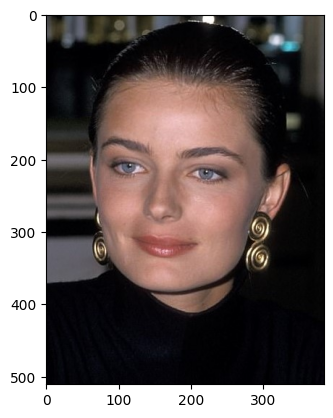

In [8]:
imgplot = plt.imshow(img)
tf.shape(img)

In [9]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=10,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [10]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [11]:
#debug
# import json
# def loadMobilenet():
#     mobilenet = json.load(open('model.json',))
#     layer = mobilenet.getLayer('conv_pw_13_relu');
#     return tf.model(inputs= mobilenet.inputs, outputs= layer.output);
# print(loadMobilenet())
# mobilenet = json.load(open('model.json',))
# for key in mobilenet:
#     print(key)
#     tf.keras.utils.image_dataset_from_directory()

In [ ]:
#debug
def build_model_with_functional():
    
    # instantiate the input Tensor
    input_layer = tf.keras.Input(shape=(28, 28))
    
    # stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    # declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

In [ ]:
#debug
model = build_model_with_functional()
#model = build_model_with_sequential()

# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [ ]:
#debug

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

In [12]:
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
#       tf.keras.layers.Conv2D(16, (3,3), activation='relu',
#                             input_shape=(150,150,3)),
#       tf.keras.layers.MaxPooling2D(2,2),
#       tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#       tf.keras.layers.MaxPooling2D(2,2),
#       tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#       tf.keras.layers.MaxPooling2D(2,2),
#       tf.keras.layers.Flatten(),
#       tf.keras.layers.Dense(512, activation='relu'),
#       tf.keras.layers.Dense(5, activation='softmax')
      
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
      
#         tf.keras.layers.Flatten(input_shape=mobilenet.outputs[0].shape.slice(1)),
#         tf.keras.layers.Dense( 100, activation='relu'),
#         tf.keras.layers.Dense( 5, activation='softmax')
  ])

  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [13]:
train_generator[399]

(array([[[[1.84313729e-01, 1.88235313e-01, 1.96078449e-01],
          [1.84313729e-01, 1.88235313e-01, 1.96078449e-01],
          [1.84795350e-01, 1.88716918e-01, 1.96560055e-01],
          ...,
          [2.50980407e-01, 2.50980407e-01, 2.54190177e-01],
          [2.50980407e-01, 2.50980407e-01, 2.54824638e-01],
          [2.50980407e-01, 2.50980407e-01, 2.58823544e-01]],
 
         [[1.85441479e-01, 1.89363047e-01, 1.97206184e-01],
          [1.84313729e-01, 1.88235313e-01, 1.96078449e-01],
          [1.84313729e-01, 1.88235313e-01, 1.96078449e-01],
          ...,
          [2.50980407e-01, 2.50980407e-01, 2.52942234e-01],
          [2.50980407e-01, 2.50980407e-01, 2.58823544e-01],
          [2.51363933e-01, 2.51363933e-01, 2.58823544e-01]],
 
         [[1.90751240e-01, 1.94672808e-01, 2.02515945e-01],
          [1.88352659e-01, 1.92274228e-01, 2.00117365e-01],
          [1.84313729e-01, 1.88235313e-01, 1.96078449e-01],
          ...,
          [2.50980407e-01, 2.50980407e-01, 2.5811

In [14]:
model = create_model()
ImageFile.LOAD_TRUNCATED_IMAGES = True

# model.fit_generator(
#     train_generator,
#     steps_per_epoch=2000,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=800)
# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
400/400 [==============================] - 313s 782ms/step - loss: 2.0406 - accuracy: 0.2192 - val_loss: 1.6144 - val_accuracy: 0.2210
Epoch 2/15
400/400 [==============================] - 186s 464ms/step - loss: 1.6018 - accuracy: 0.2383 - val_loss: 1.6212 - val_accuracy: 0.2080
Epoch 3/15
400/400 [==============================] - 194s 486ms/step - loss: 1.5992 - accuracy: 0.2355 - val_loss: 1.6178 - val_accuracy: 0.2300
Epoch 4/15
400/400 [==============================] - 185s 461ms/step - loss: 1.5960 - accuracy: 0.2440 - val_loss: 1.6331 - val_accuracy: 0.2100
Epoch 5/15
400/400 [==============================] - 188s 471ms/step - loss: 1.5969 - accuracy: 0.2298 - val_loss: 1.6350 - val_accuracy: 0.2180
Epoch 6/15
400/400 [==============================] - 215s 538ms/step - loss: 1.5899 - accuracy: 0.2520 - val_loss: 1.6244 - val_accuracy: 0.2230
Epoch 7/15
400/400 [==============================] - 196s 490ms/step - loss: 1.5944 - accuracy: 0.2365 - val_loss: 1.6244 -

KeyboardInterrupt: 

In [ ]:
# # Definisikan arsitektur model
# model = tf.keras.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(5, activation='softmax')
# ])

# # Compile model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.CategoricalCrossentropy(),
#               metrics=['accuracy'])

# # Latih model
# model.fit(train_images, train_labels, epochs=num_epochs, validation_data=(test_images, test_labels))

# # Evaluasi model
# test_loss, test_accuracy = model.evaluate(test_images, test_labels)
# print(f'Test Loss: {test_loss}')
# print(f'Test Accuracy: {test_accuracy}')